<a href="https://colab.research.google.com/github/christinabrnn/Python-Study/blob/main/Neural%20Network/2_1_Tensors_and_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Tensors**


We are now going to step through basic elements that are crucial to neural networks, starting with the concept of tensors.

In [23]:
from tensorflow.keras.datasets import mnist
#mnist: dataset of handwritten digits (0-9) sample from 3blue 1brown

from matplotlib import pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#splitting images and labels into train and test sets (mnist is pre-split)
#usually need to use X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, randomstate = 42)

Here are the dimensions, shape, and data type associated with our training dataset. This training data is a rank-3 tensor (a cube-like data structure).

*Q: What is another word for a rank-2 tensor?*

Matrix


In [24]:
print("Dimensions:", train_images.ndim,"\nShape:",train_images.shape,"\nData Type:",train_images.dtype)

Dimensions: 3 
Shape: (60000, 28, 28) 
Data Type: uint8


In [25]:
print("Dimensions:", test_images.ndim,"\nShape:",test_images.shape,"\nData Type:",test_images.dtype)

Dimensions: 3 
Shape: (10000, 28, 28) 
Data Type: uint8


Once again, let's plot what some of these pixel arrays translate to visually. Syntax for plt.subplot() here is: (rows, columns, index position where you want to display the image).

*Q: Why do we have 1+i here?*

- plt.subplot(nrows,ncols, index)

the third argument 1+i indicates the position of the current subplot that starts from 1 not 0

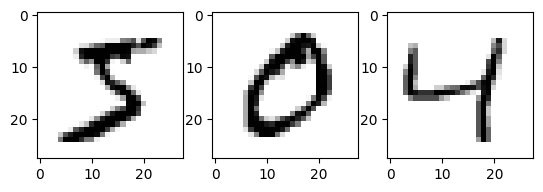

In [26]:
for i in range(3):
	# define subplot
	plt.subplot(1,3,1+i)
	# plot raw pixel data
	plt.imshow(train_images[i], cmap=plt.get_cmap('binary'))
# show the figure
plt.show()

And the corresponding labels are what we would expect.

*Q: why do we only get 3 values here, despite that we requested indices 0, 1, 2 and 3 from the vector?*

the range(3) only takes 0,1,2 from the vector. The input number is not considered

In [27]:
print(train_labels[0:3])

[5 0 4]


We can also retrieve a subset of images from the training data in a similar fashion. For a rank-3 tensor, there are technically 3 index arguments. If you only provide 1, the other two are assumed to be ':', i.e., return everything.

In [28]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

So, to obtain the top-right quadrant of the eight image in the training data, we could do the following. I'm also demonstrating syntax here for subplot2grid: (dimensions of plot grid), (starting index of figure in grid), rowspan = how many rows to cover in grid, colspan = how many cols to cover in grid.

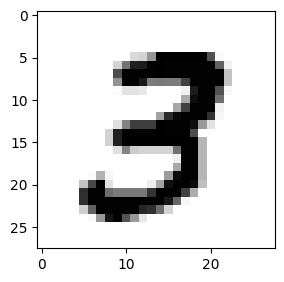

In [33]:
# First we show the whole image...
plt.subplot2grid((2,4),(0,0),rowspan=2,colspan=2)
#creates a grid of 2 rows and 4 columns start at 0,0 (the top left)
#rowspan mean it extend 2 rows down covering row 0 and 1, colspan mean it extend 2 cols right covering col 0 and 1
#this defines a 2*4 grid and then takes (0,0) -> (2,2) subplot to show and other subplot can still be added in the remaining space
#not used yet

plt.imshow(train_images[7],cmap=plt.get_cmap('binary'))
#this selects the 8th image from the dataset and shows it in binary colormap (black and white)
#plt.imshow() displayes an image

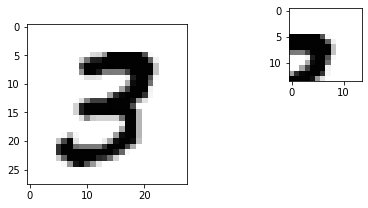

In [ ]:
# First we show the whole image...
plt.subplot2grid((2,4),(0,0),rowspan=2,colspan=2)
plt.imshow(train_images[7],cmap=plt.get_cmap('binary'))

# and then we show the upper-right quadrant
practice = train_images[7,0:14,14:28]
#eight image and the rows (height) are 0-13 and columns(width) is 14-27 = the top right corner of image 8 (14*14)

plt.subplot2grid((2,4),(0,3))
#enabled to show two images (the whole and upper right quadrant) side by side
#if using different blocks for each visualization, no need to use this

plt.imshow(practice, cmap=plt.get_cmap('binary'))
plt.show()

A common use-case for slices is to extract batches from a dataset during training. So, if I wanted to 'group' the images into a rank-4 tensor, designating batches of images, I could do something like the following (note that this isn't necessarily a useful exercise in practice; we can always just iterate and slice the dataset directly to implement batching).

In [35]:
batch_size = 50
n_batches = int(len(train_images)/batch_size)
batches = np.empty(shape=(n_batches,batch_size,28,28))
#1,200 batches and 50 images in each batch, each image is 28*28 pixels

for i in range(0,1200):
  batches[i] = train_images[i*batch_size:batch_size*(i+1)]

batches[5].shape

(50, 28, 28)

In [37]:
batches

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

#*Dot Product*

First, let's look at dot products. These are implemented as part of our forward pass on the network, to generate a prediction based on current weight values. For any given node, we need to multiply the inputs by the weights. We do this for a whole layer of neurons at the same time, via matrix multiplication.

In [39]:
a = np.array([[1,2],[3,4]])
b = np.array([[2],[3]])

def dot(v1, v2):
  return sum(x*y for x,y in zip(v1, v2))

#wrong output because zip pairs elements row-wise
#doesn't treat b as vectors but as scalars
dot(a,b)

array([11, 16])

In [40]:
a = np.array([[1,2],[3,4]])
b = np.array([[2],[3]])
# 2x2 and 2x1 so column count of a matches row count of b!
#outcome is 2*1

# This is sequential execution of a matrix dot product, i.e., using a for loop.
def dot(v1, v2):
  return sum(x*y for x, y in zip(v1, v2))
#use zip(v1,v2) because they're matrixs so need to add np.dot(a,b) or do a[0,:], b[:,0] to make it correctly work

print(dot(a[0,:],b[:,0])) #need to indicate rows 0
print(dot(a[1,:],b[:,0])) #need to indicate rows 1
#zip(a,b) does not perform matrix multiplication correctly

# And here is the vectorized equivalent via NumPy
print(np.dot(a,b))

8
18
[[ 8]
 [18]]


#*Addition & Broadcasting*

Next, let's look at matrix addition and the concept of broadcasting. We will start with a scalar.

In [ ]:
# The random.rand() function generates an array of the specified dimensions with random values.
a = np.random.rand(3,2)
print("Here is the original matrix:\n",a,"\n")
b = 5
print("And, here is the matrix plus the scalar:\n", a+b)

Here is the original matrix:
 [[0.15906373 0.34318764]
 [0.84300277 0.39253277]
 [0.77490685 0.2706931 ]] 

And, here is the matrix plus the scalar:
 [[5.15906373 5.34318764]
 [5.84300277 5.39253277]
 [5.77490685 5.2706931 ]]


Okay, let's do it with a vector now:

In [ ]:
c = np.random.rand(1,2)
print("Recall that a is:\n",a,"\n")
print("Now we make vector c:\n",c,"\n")
print("When we add a to c, c will be broadcast (copied) to create a matrix of appropriate size. So, c becomes:\n",c,"\n",c,"\n",c,"\n")
print("And, then a + c yields:\n",a+c)

Recall that a is:
 [[0.15906373 0.34318764]
 [0.84300277 0.39253277]
 [0.77490685 0.2706931 ]] 

Now we make vector c:
 [[0.40935172 0.49150955]] 

When we add a to c, c will be broadcast (copied) to create a matrix of appropriate size. So, c becomes:
 [[0.40935172 0.49150955]] 
 [[0.40935172 0.49150955]] 
 [[0.40935172 0.49150955]] 

And, then a + c yields:
 [[0.56841545 0.83469719]
 [1.25235449 0.88404233]
 [1.18425857 0.76220265]]
